# Linear Regression: Predicting miles-per-gallon usage in cars <img src="logo.png",width=140,height=140, align="right">

Begin by importing all necessary modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

mpl.style.available
mpl.style.use('ggplot')
%matplotlib inline 

The data for this exercise consist 398 datapoints on car-specific features. It can be used to predict fuel consumption in miles per gallon (mpg). Let's start by loading our original data file `car_data.csv` onto a dataframe. Use `pd.read_csv(...)`:

In [ ]:
# df = ?

OK now that it's loaded, let's have a first look at the data using `df.head()`:

In [ ]:
# ?

Do you notice anything regarding the scale of the different features?
Now let's investigate this dataset.

In [4]:
df.shape

(398, 9)

This says that we have 398 observations and 9 variables. We already know that our first variable (`mpg`) is our predictor variable `Y`, so that means that we have 8 features. However, let's disregard the `name` of the cars, as extracting information from this feature is difficult (can you think why?). Now let's check whether we have any missing values in our dataset:

In [ ]:
# ?

Hmm ok, so that means that there are 6 instances in the dataset where a value is missing. Thankfully it's not too many cases, so let's do the easy thing and drop them. 

In [6]:
df = df.dropna(axis=0)
df.shape

(392, 9)

Great, so now that we dropped those missing values, let's have a first look at the thing we want to predict, miles-per-gallon. 

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

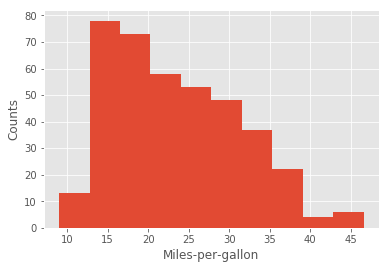

In [7]:
plt.hist(df["mpg"], bins=10)
plt.xlabel("Miles-per-gallon")
plt.ylabel("Counts")
df["mpg"].describe()

We can see that on average our cars consume 23 mpg, even though most of our observations are in the 15-20 region. A standard deviation of 7 mpg suggests that our observations are quite spread around the mean, and we can see that cars in our dataset vary from 9 to 46 mpg.

Now let's start with plotting some relations between features and `mpg` in a scatter plot, to get a feel for our data. You can use `plt.scatter()` to plot `horsepower` against `mpg`, then `weight` against `mpg`.

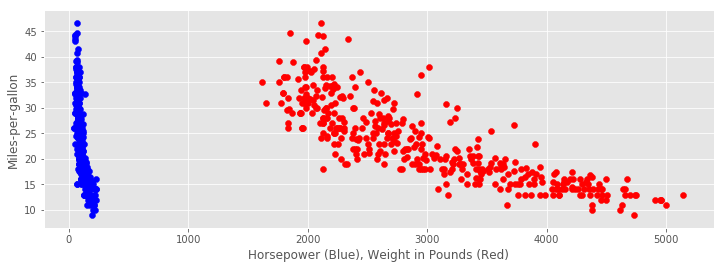

In [8]:
plt.figure(figsize=(12, 4))
# plt.scatter(df["horsepower"], ?, c="b")
# plt.scatter(?, df["mpg"], c="r")
plt.ylabel("Miles-per-gallon")
plt.xlabel("Horsepower (Blue), Weight in Pounds (Red)")

Whoa, this looks funky! Let's do something about the scale of our variables.

## Feature Scaling

If you look at the various car features, they are measured on very different scales. If we ignored this, our optimization problem would take long to solve - as we would seek the minimum of a very asymmetric cost function. To make sure that all features are on the same scale, we will apply a little function to scale our features. You can also do this with `Scikit-learn`.


Let's write our own function to scale features according to:

$$x_i = \frac{x_i - \mu_i}{std(x_i)}$$

You can use the `mean()` and `max()` operators built into Pandas to do this. The function should return both the scaled input vector, as well as the mean and standard deviation to be used in scaling further samples.

In [9]:
def feature_scale(x):
    """Scale features to have zero mean
    and unit standard deviation."""
    # mu = ?
    # std = ?
    # x_scaled = ?
    return x_scaled, mu, std

Scale both input features, and store them in new columns of the dataframe. Moreover, assign the means and standard deviations to variables called `hp_mu`, `weight_mu`, `hp_std` and `weight_std`.

In [10]:
# df["power_scaled"], ?, hp_std = feature_scale(?)
# df["weight_scaled"], weight_mu, ? = feature_scale(?)

# Check that it works by printing the maximum values of 
# the normal weight feature and the scaled weight feature
print (df["weight"].max())
print (df["weight_scaled"].max())

5140
2.54580798087


Cool, that worked!

Now, let's plot again those two features using `plt.scatter()` so as to check the scaling effect:

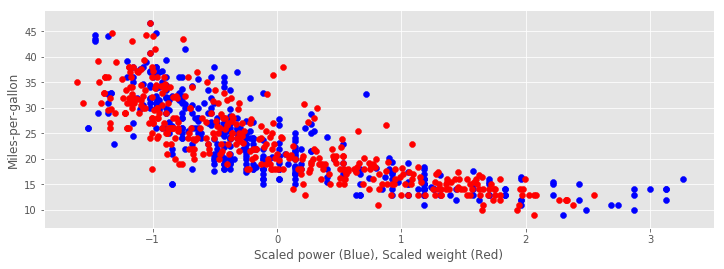

In [11]:
plt.figure(figsize=(12, 4))
plt.scatter(df["power_scaled"], df["mpg"], c="b")
plt.scatter(df["weight_scaled"], df["mpg"], c="r")
plt.ylabel("Miles-per-gallon")
plt.xlabel("Scaled power (Blue), Scaled weight (Red)")

Nice work! Now that we've carried out the feature scaling with our own function, let us see how this is done with an existing package. We start by splitting our dataset into target and feature variables, `Y` and `X`. 

In [12]:
# X = ?
# Y = ?

# Let us check whether this worked by
# getting the shape of feature set X
X.shape

(392, 7)

As we would expect, the feature set contains 398 observations of cars, with 7 different variables. Before we can use our fancy scaler from Scikit-Learn, we have to transform the feature set `X` to an array (i.e. a matrix). Right now `X` is a dataframe, so we can very simply change that with the commands below.

In [13]:
# Let's transform the dataframe X to an array called features.
features = np.array(X).astype(np.float)

# And let's save our feature names. 
header = X.columns

# These might come in handy later on.
print(header, features)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object') [[   8.   307.   130.  ...,   12.    70.     1. ]
 [   8.   350.   165.  ...,   11.5   70.     1. ]
 [   8.   318.   150.  ...,   11.    70.     1. ]
 ..., 
 [   4.   135.    84.  ...,   11.6   82.     1. ]
 [   4.   120.    79.  ...,   18.6   82.     1. ]
 [   4.   119.    82.  ...,   19.4   82.     1. ]]


Super, now we're finally ready for our Scikit-Learn magic; let's apply the `StandardScaler` to the feature set:

In [14]:
scaler = StandardScaler().fit(features)
scaled_features = scaler.transform(features)
print(scaled_features)

[[ 1.48394702  1.07728956  0.66413273 ..., -1.285258   -1.62531533
  -0.71664105]
 [ 1.48394702  1.48873169  1.57459447 ..., -1.46672362 -1.62531533
  -0.71664105]
 [ 1.48394702  1.1825422   1.18439658 ..., -1.64818924 -1.62531533
  -0.71664105]
 ..., 
 [-0.86401356 -0.56847897 -0.53247413 ..., -1.4304305   1.63640964
  -0.71664105]
 [-0.86401356 -0.7120053  -0.66254009 ...,  1.11008813  1.63640964
  -0.71664105]
 [-0.86401356 -0.72157372 -0.58450051 ...,  1.40043312  1.63640964
  -0.71664105]]


## Introduction to Linear Regression

OK - now that we have scaled our features, we're basically ready to start the regression fun. Before we dive into Scikit-Learn models, let's get some intuition for what a regression actually does. Let's try to fit a simple model on scatter plot of `weight` and `mpg`. 

In [15]:
# Our X variable is going to be weight, 
# and our Y variable is mpg. 
x = df["weight_scaled"]

In the cell below, define the linear function
$$f = \alpha + \beta\hspace{1pt}x$$

In [16]:
def linear(x, alpha, beta):
    # f = ?
    return f

We now take a guess about the values of $\alpha$ and $\beta$. We then use the linear function to predict fuel consumption, and save this as a new vector called `Y_predicted`.

In [17]:
alpha = 20
beta = 0
Y_predicted = linear(x, alpha, beta)

`Y_predicted` is a simple line with intercept `alpha` and slope `beta`. Let's create a scatter plot and overlay our predictions using `plt.plot()`. We'll then see `Y_predicted` as a line over the real values in the scatter plot. 

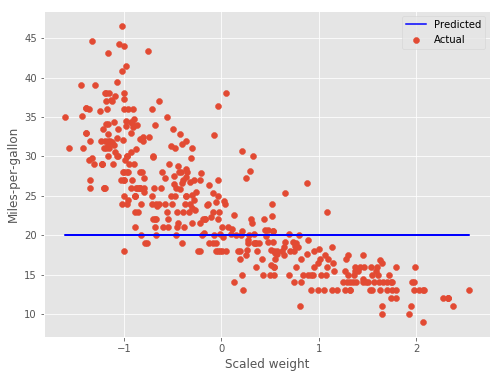

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(x, Y, label="Actual")
plt.plot(x, Y_predicted, c="b", label="Predicted")
plt.ylabel("Miles-per-gallon")
plt.xlabel("Scaled weight")
plt.legend()

That looks like a bad fit! Our line does not follow the pattern at all. Can you attain a better fit to the data by changing the intercept and slope?

**Exercise:** Find values of `alpha` and `beta` that yield a better fit of the data.

In [ ]:
# Change the values of alpha and beta.
# alpha = ?
# beta = ?

# Use the linear model.
# Y_predicted = ?

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, Y, label="Actual")
plt.plot(x, Y_predicted, c="b", label="Predicted")
plt.ylabel("Miles-per-gallon")
plt.xlabel("Scaled weight")
plt.legend()

Hopefully you've managed to fit the model to the data. That should give you some intuition as to what a regression model does - it tries to find the parameters that best represent the data. Let's now get a machine-learning algorithm show us how it's done.

## Linear Regression with Scikit-Learn

So now that we have cleaned, investigated and scaled our data, we're ready for a linear regression using Scikit-Learn. Let's start by splitting our data into a *training* set and a *test* set. Scikit-Learn has a function that we can use. You can learn more about it here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

As an aside, because we will not optimise the complexity of our model (the number of parameters), we will not make use of a *validation* dataset. The data are split into a training part and a test part *only*. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, Y, test_size=0.5, random_state=0)

`test_size` should be a value between 0 and 1, where the number is an indication for the percentage of train- versus test-data of the total sample size.

It doesn't matter if the `random_state` is set to 0 or 1 or any other integer. What matters is that it should be the same value each time you run the code, so your results stay the same should you run the code multiple times. You often see `random_state=42` being used in official examples of Scikit-Learn.

`random_state`, as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices.

The following function helps you get a nicely printed model with the variable names attached to the coefficients in the regression; we will use it later on.

In [21]:
# Don't worry about understanding this code.
def pretty_print_linear(coefs, names, sort = False):
    """Print the model parameters and features in nice format."""
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 2), name)
                                   for coef, name in lst)

OK, let's take the `LinearRegression` from Scikit-Learn, and let's fit this model to our training data. Then, we can print the parameters (coefficients) so as to gain valuable insight.

In [22]:
model = LinearRegression()
# model.fit(?, ?)

print("Our linear model is as follows:\n",
      pretty_print_linear(model.coef_, header, sort=True))

Our linear model is as follows:
 -5.44 * weight + 2.84 * model_year + 1.38 * displacement + 1.08 * origin + 0.49 * acceleration + -0.46 * horsepower + -0.21 * cylinders


** Exercise:** Looking at these coefficients, would you consider dropping any of the features?

So - do you understand how the model predicts? 

Let's have a look at the following observation,
![alt text](example_row.png)

Could we use our model to directly predict miles-per-gallon usage of the Chevrolet Chevelle Malibu based on this? And would it be close to the actual consumption of 18 mpg?

Well, it's not that simple. Recall that we have scaled our features, so the coefficients of our model are only applicable to the scaled values. Moreover, we have set an intercept for the model, which we haven't displayed here. But with the intercept, the scaled features, and coefficients from our model, we could calculate the predicted values ourselves. 

Thankfully, Scikit-Learn can do it for you! Below we compute the values of mpg for the test part of the dataset. We can use that to compare our predicted mpg values to the actual mpg values, and assess how good our model is.

In [28]:
# generate predicted values of mpg based on our model
# predicted = model.predict(?)

Now that we have our predicted values, let's see how well they compare to the actual values. We'll look at three metrics to evaluate how well our model does. 

The $R^2$ (or R-squared) metric provides an indication for the goodness of fit. It takes the value 0 for no-fit and 1 for perfect fit. The $R^2$ can be interpreted as the % of variation in the target variable `Y` that can be attributed to features used in the model. Let'se see what it looks like...

In [29]:
print(metrics.r2_score(y_test, predicted))

0.821206237313


So about 80% of the variation in mpg across cars can be explained by 7 features, leaving only 20% of variation unexplained. This is actually not bad. 

The Mean Absolute Error (or MAE) is the sum of absolute differences between the predictions and the actual values. It gives an idea of "how wrong are the predictions". The closer to 0 this value is, the better. The measure specifies the magnitude of the error, but not the direction (e.g. over or under predicting).

In [25]:
# print(metrics.mean_absolute_error(?, ?))

2.52751926975


The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides an estimate for the magnitude of error. Taking the square root of the MSE converts the units back to the original units of the output variable, and can be helpful for description and presentation. This is called the Root Mean Squared Error (or RMSE).

In [32]:
# RMSE = np.sqrt(metrics.mean_squared_error(?, ?)) 
print(RMSE)

3.26304360092


We have a RMSE of 3.3 and a mean absolute error of 2.5, but is this any good? 
Let's put this into context by having another look at the description of our target variable.

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

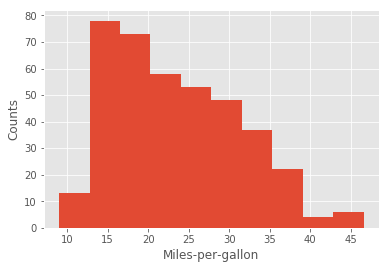

In [34]:
plt.hist(Y, bins=10)
plt.xlabel("Miles-per-gallon")
plt.ylabel("Counts")
Y.describe()

We're getting predictions that on average vary between 2.5 mpg and 3 mpg from their actual value - that's not too bad. It's not super accurate, but at least it's smaller than our standard deviation of 7 mpg.

Can you think of ways to improve the accuracy of our predictions? I.e. how to make the error smaller?

**Exercise:** Recall that we split our data into half training data and half test data. Can you increase the % we use for training data, and check what that does to our model error? What happens if you reduce the % of data used for training?

Copyright © ASI 2017 All rights reserved